<a href="https://colab.research.google.com/github/tcreamype3R/Colab-R/blob/main/Entorno_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 🚀 FLUJO DE TRABAJO RECOMENDADO EN COLAB
# 1. Ejecuta las celdas de instalación de paquetes (solo primera vez por sesión)
# 2. Ejecuta las celdas de carga de librerías
# 3. Sube tus datos o genera datos de ejemplo
# 4. Realiza tu análisis y visualizaciones
# 5. Guarda tus resultados importantes fuera de Colab

# ⚠️ Recuerda: Esta sesión temporal se cerrará eventualmente.
# Todo el código necesario debe estar en este notebook para que sea reproducible.


# Instalar los paquetes necesarios (solo necesario ejecutar una vez)
install.packages("cluster")
install.packages("factoextra")
install.packages("ggplot2")
install.packages("pheatmap")
install.packages("ggiraphExtra") # Contiene ggRadar
install.packages("dplyr")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message in install.packages("cluster"):
“installation of package ‘cluster’ had non-zero exit status”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘rbibutils’, ‘Deriv’, ‘microbenchmark’, ‘Rdpack’, ‘doBy’, ‘SparseM’, ‘MatrixModels’, ‘minqa’, ‘nloptr’, ‘reformulas’, ‘RcppEigen’, ‘lazyeval’, ‘carData’, ‘Formula’, ‘pbkrtest’, ‘quantreg’, ‘lme4’, ‘crosstalk’, ‘estimability’, ‘mvtnorm’, ‘numDeriv’, ‘corrplot’, ‘viridis’, ‘car’, ‘DT’, ‘ellipse’, ‘emmeans’, ‘flashClust’, ‘leaps’, ‘multcompView’, ‘scatterplot3d’, ‘ggsci’, ‘cowplot’, ‘ggsignif’, ‘gridExtra’, ‘polynom’, ‘rstatix’, ‘plyr’, ‘abind’, ‘dendextend’, ‘FactoMineR’, ‘ggpubr’, ‘reshape2’, ‘ggrepel’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing packag

# Nueva sección

In [ ]:
# Cargar las librerías
library(cluster)
library(factoextra)
library(ggplot2)
library(pheatmap)
library(ggiraphExtra)
library(dplyr)

Loading required package: ggplot2

Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [ ]:
# Cargar datos
data(mtcars)

# Escalar los datos para que todas las variables tengan la misma importancia en la distancia
df <- scale(mtcars)

# Ver las primeras filas
head(df)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Mazda RX4,0.1508848,-0.1049878,-0.57061982,-0.5350928,0.5675137,-0.610399567,-0.7771651,-0.8680278,1.1899014,0.4235542,0.7352031
Mazda RX4 Wag,0.1508848,-0.1049878,-0.57061982,-0.5350928,0.5675137,-0.349785269,-0.4637808,-0.8680278,1.1899014,0.4235542,0.7352031
Datsun 710,0.4495434,-1.2248578,-0.99018209,-0.7830405,0.4739996,-0.917004624,0.4260068,1.1160357,1.1899014,0.4235542,-1.1221521
Hornet 4 Drive,0.2172534,-0.1049878,0.22009369,-0.5350928,-0.9661175,-0.002299538,0.8904872,1.1160357,-0.8141431,-0.9318192,-1.1221521
Hornet Sportabout,-0.2307345,1.0148821,1.04308123,0.4129422,-0.8351978,0.227654255,-0.4637808,-0.8680278,-0.8141431,-0.9318192,-0.5030337
Valiant,-0.3302874,-0.1049878,-0.04616698,-0.6080186,-1.5646078,0.248094592,1.3269868,1.1160357,-0.8141431,-0.9318192,-1.1221521


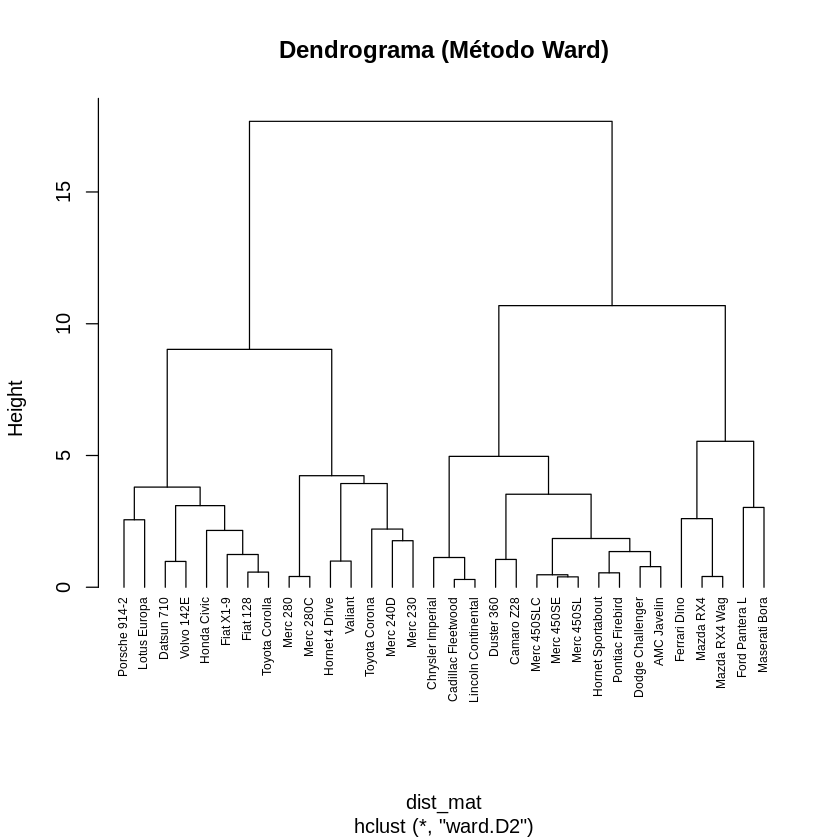

In [ ]:
# Calcular la matriz de distancias
dist_mat <- dist(df, method = "euclidean")

# Clustering jerárquico con el método de Ward
hc <- hclust(dist_mat, method = "ward.D2")

# Dibujar el dendrograma clásico
plot(hc, cex = 0.6, hang = -1, main = "Dendrograma (Método Ward)")

In [ ]:
# 1. Dendrograma mejorado y circular
factoextra::fviz_dend(hc, k = 3, # Cortar en 3 grupos
          cex = 0.7,
          k_colors = c("#2E9FDF", "#E7B800", "#FC4E07"),
          color_labels_by_k = TRUE,
          rect = TRUE,
          rect_border = c("#2E9FDF", "#E7B800", "#FC4E07"),
          rect_fill = TRUE,
          main = "Dendrograma - Estilo Circular",
          type = "circular") # Cambiar a "phylogenic" para otro estilo

# 2. Cortar el árbol para definir 3 grupos
clusters <- cutree(hc, k = 3)
mtcars$cluster <- as.factor(clusters)

# 3. Cluster Plot en 2D (usando PCA)
factoextra::fviz_cluster(list(data = df, cluster = clusters),
             palette = c("#2E9FDF", "#E7B800", "#FC4E07"),
             ggtheme = theme_minimal(),
             main = "Plot de Clústeres PCA (2D)")

ERROR: Error in loadNamespace(x): there is no package called ‘factoextra’


In [ ]:
# Ensure factoextra is installed in a standard library location
install.packages("factoextra", lib = .libPaths()[1])

also installing the dependencies ‘rbibutils’, ‘Deriv’, ‘microbenchmark’, ‘Rdpack’, ‘doBy’, ‘SparseM’, ‘MatrixModels’, ‘minqa’, ‘nloptr’, ‘reformulas’, ‘RcppEigen’, ‘lazyeval’, ‘carData’, ‘Formula’, ‘pbkrtest’, ‘quantreg’, ‘lme4’, ‘crosstalk’, ‘estimability’, ‘mvtnorm’, ‘numDeriv’, ‘corrplot’, ‘viridis’, ‘car’, ‘DT’, ‘ellipse’, ‘emmeans’, ‘flashClust’, ‘leaps’, ‘multcompView’, ‘scatterplot3d’, ‘ggsci’, ‘cowplot’, ‘ggsignif’, ‘gridExtra’, ‘polynom’, ‘rstatix’, ‘plyr’, ‘abind’, ‘dendextend’, ‘FactoMineR’, ‘ggpubr’, ‘reshape2’, ‘ggrepel’




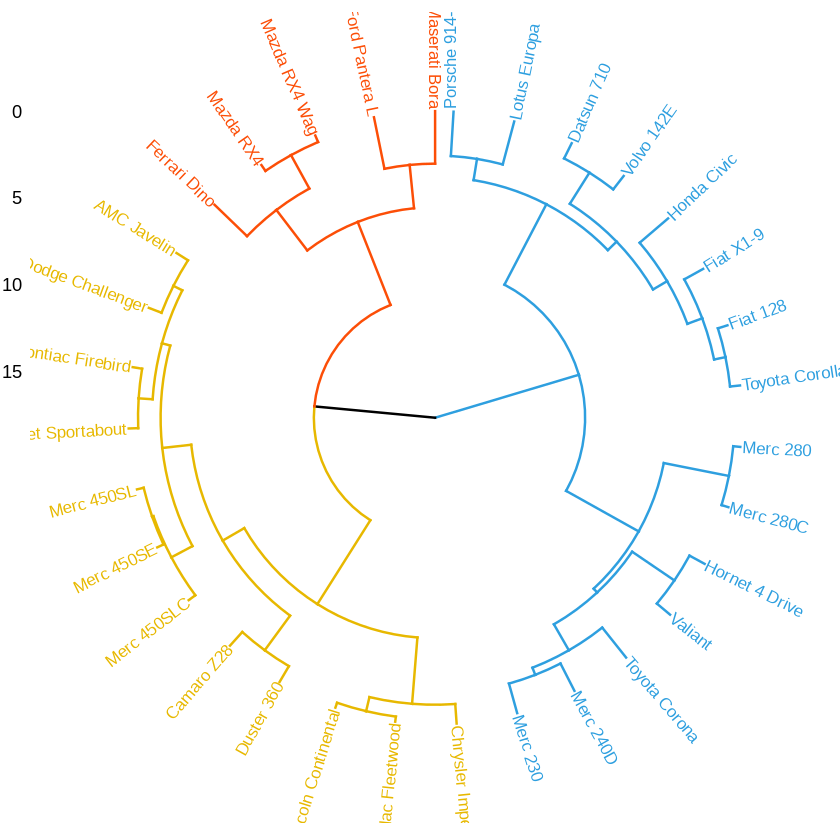

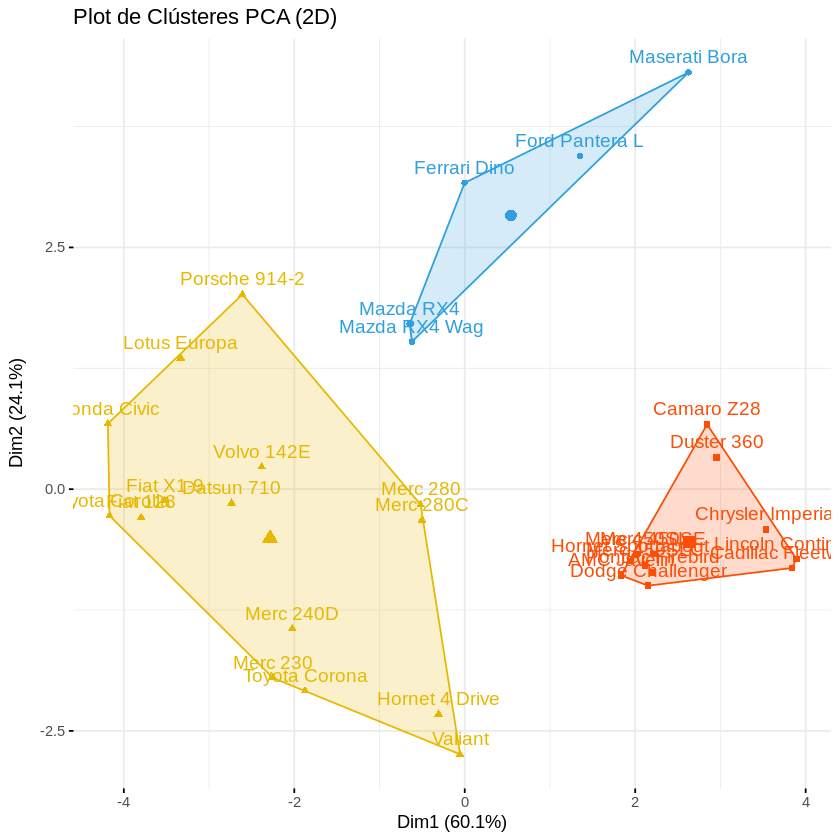

In [ ]:
# Load the library after installation
library(factoextra)

# 1. Dendrograma mejorado y circular
factoextra::fviz_dend(hc, k = 3, # Cortar en 3 grupos
          cex = 0.7,
          k_colors = c("#2E9FDF", "#E7B800", "#FC4E07"),
          color_labels_by_k = TRUE,
          rect = TRUE,
          rect_border = c("#2E9FDF", "#E7B800", "#FC4E07"),
          rect_fill = TRUE,
          main = "Dendrograma - Estilo Circular",
          type = "circular") # Cambiar a "phylogenic" para otro estilo

# 2. Cortar el árbol para definir 3 grupos
clusters <- cutree(hc, k = 3)
mtcars$cluster <- as.factor(clusters)

# 3. Cluster Plot en 2D (usando PCA)
factoextra::fviz_cluster(list(data = df, cluster = clusters),
             palette = c("#2E9FDF", "#E7B800", "#FC4E07"),
             ggtheme = theme_minimal(),
             main = "Plot de Clústeres PCA (2D)",
             legend = "none") # Add this to address the warning

In [ ]:
# Load the pheatmap library
library(pheatmap)

# Crear un heatmap donde las filas se ordenan según el clúster
pheatmap(df,
         annotation_row = data.frame(Cluster = mtcars$cluster),
         cluster_rows = hc,
         cutree_rows = 3,
         color = colorRampPalette(c("navy", "white", "firebrick3"))(100),
         main = "Heatmap Agrupado por Clúster",
         show_rownames = TRUE)

ERROR: Error in check.length("fill"): 'gpar' element 'fill' must not be length 0


In [ ]:
# Load the dplyr library
library(dplyr)
# Load the ggiraphExtra library
library(ggiraphExtra)

# Calcular la media de cada variable para cada clúster
cluster_means <- mtcars %>%
  select(-cluster) %>% # excluir la columna cluster para el cálculo
  mutate(Cluster = clusters) %>%
  group_by(Cluster) %>%
  summarise(across(everything(), mean))

# Ver los datos preparados para el radar
print(cluster_means)

# Crear el gráfico de radar
ggRadar(cluster_means,
        aes(color = Cluster, group = Cluster),
        rescale = FALSE, # Usar FALSE para mantener las escalas originales
        size = 2,
        interactive = FALSE,
        main = "Perfil Medio de los Clústeres (Radar Chart)") +
  scale_color_manual(values = c("#2E9FDF", "#E7B800", "#FC4E07")) +
  theme(legend.position = "bottom")

ERROR: Error in library(ggiraphExtra): there is no package called ‘ggiraphExtra’


In [ ]:
# Ensure pheatmap is installed in a standard library location
install.packages("pheatmap", lib = .libPaths()[1])

Loading required package: ggplot2

`geom_smooth()` using formula = 'y ~ x'


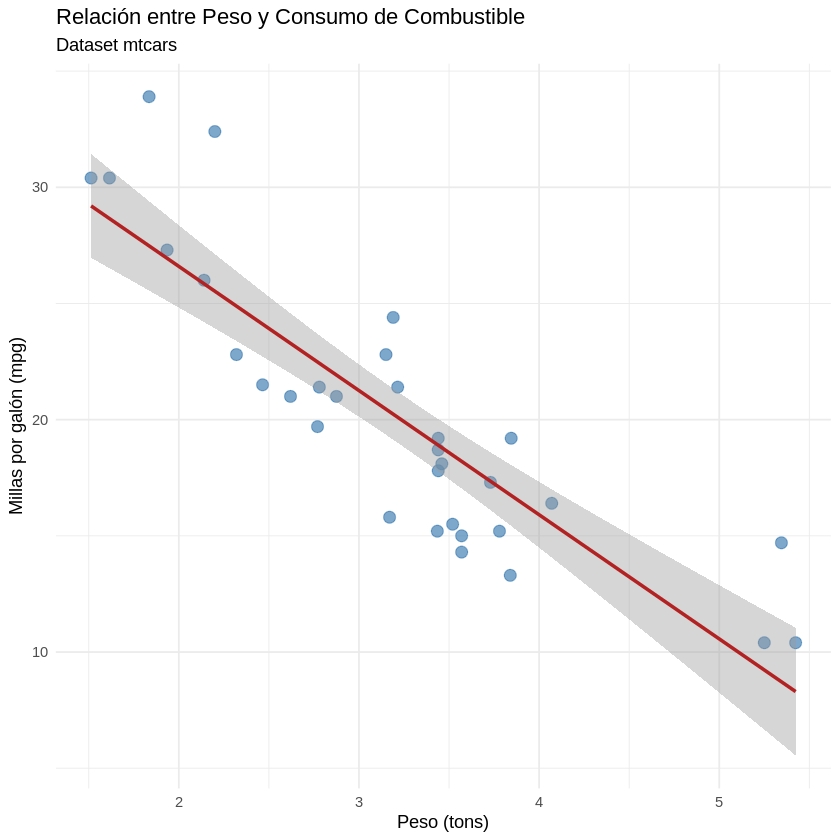

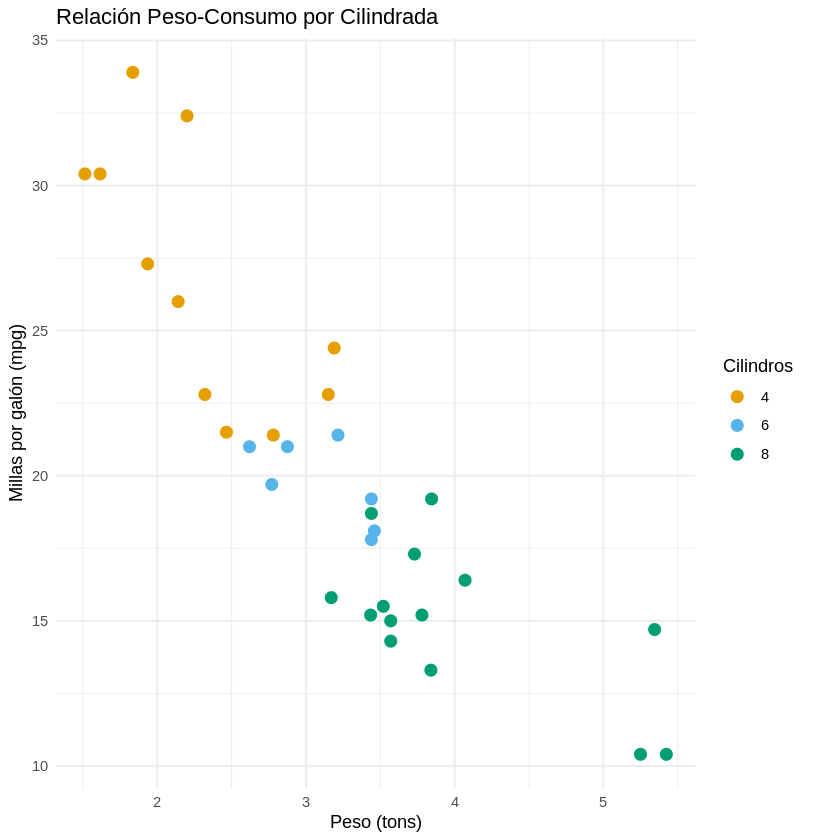

In [ ]:
# 📊 Visualización con ggplot2
# ggplot2 es el paquaje más popular para crear gráficos elegantes y personalizables.

# Asegurémonos de que está instalado y cargado
if(!require(ggplot2)) install.packages("ggplot2")
library(ggplot2)

# Usemos el dataset mtcars que ya viene incluido en R
# Gráfico de puntos básico: peso del coche (wt) vs millas por galón (mpg)
ggplot(mtcars, aes(x = wt, y = mpg)) +
  geom_point(size = 3, alpha = 0.7, color = "steelblue") + # Puntos azules
  geom_smooth(method = "lm", se = TRUE, color = "firebrick") + # Línea de tendencia
  labs(title = "Relación entre Peso y Consumo de Combustible",
       subtitle = "Dataset mtcars",
       x = "Peso (tons)",
       y = "Millas por galón (mpg)") +
  theme_minimal() # Tema minimalista

# 📈 Ejemplo más avanzado: color por número de cilindros
ggplot(mtcars, aes(x = wt, y = mpg, color = as.factor(cyl))) +
  geom_point(size = 3) +
  labs(title = "Relación Peso-Consumo por Cilindrada",
       x = "Peso (tons)",
       y = "Millas por galón (mpg)",
       color = "Cilindros") +
  scale_color_manual(values = c("#E69F00", "#56B4E9", "#009E73")) + # Colores accesibles
  theme_minimal()

# ggplot2 permite crear casi cualquier visualización: histogramas, boxplots, etc.
# ¡Explora la documentación para más ideas!

In [ ]:
# ❌ Troubleshooting: Solución de problemas comunes

# 1. Error al instalar paquetes por dependencias del sistema
# Ejemplo: Error: library 'libxml2' not found
# Solución: Instalar la dependencia del sistema primero (en Colab se usa apt)
# Ejecutar en una celda de código (con ! para comandos de shell):
# !sudo apt-get install -y libxml2-dev

# 2. El paquete no se encuentra en CRAN
# Si el paquete está en GitHub, usa:
# library(devtools)
# install_github("usuario/repositorio")

# 3. Error: "package not available for this version of R"
# Colab a veces puede tener una versión ligeramente desactualizada de R.
# Verifica tu versión con:
version$version.string

# 4. Problemas de memoria
# Si tu análisis es muy pesado, puedes aumentar la memoria o reiniciar el entorno:
# Runtime -> Restart runtime (esto borrará la memoria pero no el código)

# 5. ¿Los cambios no se reflejan?
# Siempre recuerda cargar el paquete después de instalarlo:
# library(nombre_del_paquete)

# 6. Error de "timeout" al instalar
# Los paquetes muy grandes pueden tardar. Puedes aumentar el tiempo:
# options(timeout = 600) # 10 minutos en lugar de 60 segundos

[1] "R version 4.5.1 (2025-06-13)"

In [ ]:
# 💡 IMPORTANTE: Entorno Efímero en Colab

# Google Colab proporciona recursos de computación temporal de forma GRATUITA.
# Esto tiene una implicación crucial:

# "TODOS LOS CAMBIOS SE PIERDEN CUANDO SE CIERRA LA SESIÓN"

# Esto incluye:
# - Paquetes instalados con install.packages()
# - Archivos subidos a la sesión
# - Variables en memoria

# 📌 MEJORES PRÁCTICAS:

# 1. INCLUYE TODAS LAS INSTALACIONES EN EL NOTEBOOK
#    Siempre incluye celdas con install.packages() al inicio.
#    Así cualquiera (o tú en el futuro) puede ejecutar el notebook completo.

# 2. SUBE ARCHIVOS NECESARIOS CON CÓDIGO
#    Usa el panel de archivos o comandos para subir datos importantes.
#    Para datos pequeños, considera incluirlos en GitHub y cargarlos por URL:
#    datos <- read.csv("https://raw.githubusercontent.com/usuario/repo/archivo.csv")

# 3. GUARDA TU TRABAJO
#    - Guarda el notebook en Google Drive o GitHub
#    - Exporta resultados importantes a Drive o descárgalos localmente
#    - Usa sessionInfo() para registrar tu entorno:
sessionInfo()

# 4. REINICIA Y EJECUTA TODO
#    Antes de compartir, ve a "Runtime -> Run all" para verificar que todo funciona desde cero.

# ¡Planifica para lo efímero y tu experiencia en Colab será mucho más fluida!

R version 4.5.1 (2025-06-13)
Platform: x86_64-pc-linux-gnu
Running under: Ubuntu 22.04.4 LTS

Matrix products: default
BLAS:   /usr/lib/x86_64-linux-gnu/openblas-pthread/libblas.so.3 
LAPACK: /usr/lib/x86_64-linux-gnu/openblas-pthread/libopenblasp-r0.3.20.so;  LAPACK version 3.10.0

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

time zone: Etc/UTC
tzcode source: system (glibc)

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] ggplot2_3.5.2

loaded via a namespace (and not attached):
 [1] crayon_1.5.3       vctrs_0.6.5        nlme_3.1-168       cli_3.6.5         
 [5] rlang_1.1.6        generics_0.1

In [1]:
# Install required packages with dependencies
install.packages("cluster", dependencies = TRUE)
install.packages("factoextra", dependencies = TRUE)
install.packages("ggplot2", dependencies = TRUE)
install.packages("pheatmap", dependencies = TRUE)
install.packages("ggiraphExtra", dependencies = TRUE)
install.packages("dplyr", dependencies = TRUE)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘rbibutils’, ‘Deriv’, ‘microbenchmark’, ‘Rdpack’, ‘doBy’, ‘SparseM’, ‘MatrixModels’, ‘minqa’, ‘nloptr’, ‘reformulas’, ‘RcppEigen’, ‘lazyeval’, ‘carData’, ‘Formula’, ‘pbkrtest’, ‘quantreg’, ‘lme4’, ‘crosstalk’, ‘estimability’, ‘mvtnorm’, ‘numDeriv’, ‘corrplot’, ‘viridis’, ‘car’, ‘DT’, ‘ellipse’, ‘emmeans’, ‘flashClust’, ‘leaps’, ‘multcompView’, ‘scatterplot3d’, ‘ggsci’, ‘cowplot’, ‘ggsignif’, ‘gridExtra’, ‘polynom’, ‘rstatix’, ‘plyr’, ‘pixmap’, ‘sp’, ‘RcppArmadillo’, ‘abind’, ‘dendextend’, ‘FactoMineR’, ‘ggpubr’, ‘reshape2’, ‘ggrepel’, ‘ade4’, ‘ca’, ‘igraph’, ‘mclust’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘proxy’, ‘checkmate’, ‘zoo’, ‘e1071’, ‘wk’, ‘rex’, ‘htmlTable’, ‘colorspace’, ‘TH.data’, ‘sandwich’, ‘classIn

In [2]:
# Install packages with all dependencies
install.packages("cluster", dependencies = TRUE)
install.packages("factoextra", dependencies = TRUE)
install.packages("ggplot2", dependencies = TRUE)
install.packages("pheatmap", dependencies = TRUE)
install.packages("ggiraphExtra", dependencies = TRUE)
install.packages("dplyr", dependencies = TRUE)

# Load libraries
library(cluster)
library(factoextra)
library(ggplot2)
library(pheatmap)
library(ggiraphExtra)
library(dplyr)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘flextable’, ‘ztable’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: ggplot2

Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


